In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc


In [5]:
# Load the dataset
diabetes = pd.read_csv('diabetesdata.csv')

In [6]:
# Data cleaning
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in replace_zero:
    diabetes[column] = diabetes[column].replace(0, np.NaN)
    mean = int(diabetes[column].mean(skipna=True))
    diabetes[column] = diabetes[column].replace(np.NaN, mean)


In [7]:
# Split data
X = diabetes.iloc[:, 0:8]
y = diabetes.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


In [8]:
# Standardize the data - Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
# Calculate training and test accuracy for Logistic Regression
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print("\nLogistic Regression:")
print("Training Accuracy:", train_accuracy_lr)
print("Test Accuracy:", test_accuracy_lr)


Logistic Regression:
Training Accuracy: 0.7671009771986971
Test Accuracy: 0.8116883116883117


In [10]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
# Calculate training and test accuracy for Random Forest Classifier
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("\nRandom Forest Classifier:")
print("Training Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)



Random Forest Classifier:
Training Accuracy: 1.0
Test Accuracy: 0.8311688311688312


In [11]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)
# Calculate training and test accuracy for Support Vector Machine (SVM)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("\nSupport Vector Machine (SVM):")
print("Training Accuracy:", train_accuracy_svm)
print("Test Accuracy:", test_accuracy_svm)


Support Vector Machine (SVM):
Training Accuracy: 0.8175895765472313
Test Accuracy: 0.7727272727272727


In [ ]:
# Cross-validation score
cv_score_svm = cross_val_score(svm, bp_x, bp_y, cv=5)
print("Cross-Validation Score:", cv_score_svm.mean())

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(bp_y_test, y_pred_class_svm))

print("\nClassification Report:")
print(classification_report(bp_y_test, y_pred_class_svm))

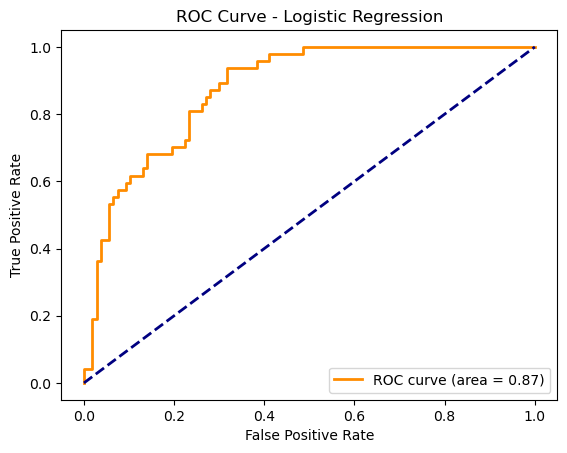

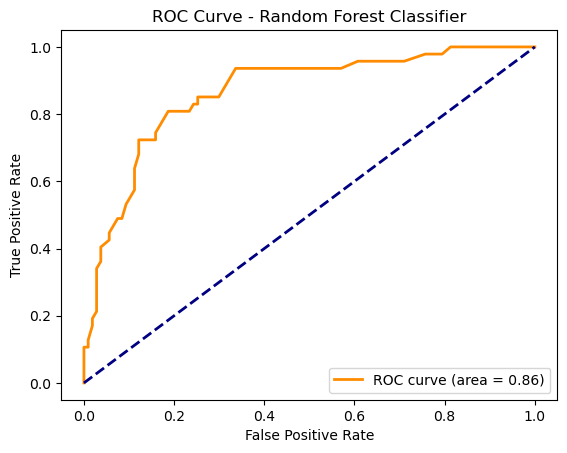

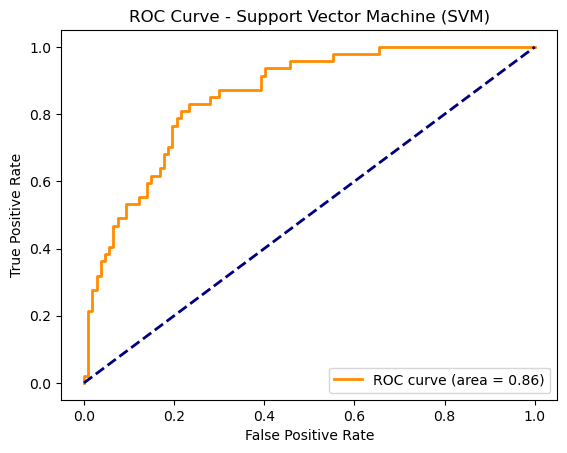

In [13]:
# Plot ROC curve and calculate AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve and calculate AUC for Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve and calculate AUC for Support Vector Machine (SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine (SVM)')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Save the model with the highest AUC
#This helps visualize the trade-off between sensitivity and specificity.
models_auc = {'Logistic Regression': roc_auc_lr, 'Random Forest Classifier': roc_auc_rf, 'SVM': roc_auc_svm}
best_model_name_auc = max(models_auc, key=models_auc.get)
best_model_auc = lr_model if best_model_name_auc == 'Logistic Regression' else (
    rf_model if best_model_name_auc == 'Random Forest Classifier' else svm_model)
print("\nBest Model based on AUC:", best_model_name_auc)


Best Model based on AUC: Logistic Regression


In [ ]:
#classification report
#ANN 
#hyperparametertunning